## Final Project Submission

Please fill out:
* Student name: Isobel Daley
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


# King County House Price Project

## Introduction

***TO BE COMPLETED AT THE END**

## Business Understanding

## Importing Required Libraries


In [1]:
# Pandas is used for data manipulation and analysis
# Numpy is used to create multidimensional arrays, and to perform mathematical function

import pandas as pd
import numpy as np

# Matplotlib is used to create visualisations.  
# Seaborn sits on top of Matplotlib, allowing the creation of more visually appealing visualisations

import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Data

Pandas provides the functionality necessary to import data.  The data has been provided in CSV file "kc_house_data.csv".  It is available in the repository in which we are working.  

The data can therefore be imported using the pd.read_csv() function.

In [2]:
kc_data = pd.read_csv("kc_house_data.csv")

## Getting to Know the Data

Before we start working with the data, we need to understand its key characteristics.  This includes:

- The column names
- The nature of each variable (e.g. is it numerical or text, continuous or discrete)
- The presence of null values/missing data

### Column Names

For ease of reference, the column names are provided below, alongside a brief description.

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Variable Characteristics

To understand the nature of each variable, we can first use the .info() function to provide identify the type and number of each variable.

In [3]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


From the above, we can infer:
- There are 21,597 observations in total
- Three variables have missing values (waterfront, yr_renovated, view).  These will be investigated further shortly.
- The variables are a mix of integers, floats and objects.  
- The type of certain variables may need to be changed when cleaning the data.  For example:

    - floors, waterfront, view, yr_renovated should be an integer.  It is not possible to have half a floor or half a waterfront.
    - sqft_basement is an object.  This should be an integer.
    - date may need to be converted to a datetime.  
 
To investigate further, we can use the .head() command to inspect the first few rows of the dataframe.

In [4]:
# This command ensures that all columns are displayed when using the .head() command.  Without it, some are hidden from view.
pd.set_option('display.max_columns', 500)
# .head(x) displays the first x rows from a given dataframe.
kc_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


The above provides more details on certain features:
- **bathrooms** is a float, which assumes non-whole numbers.  According to the column descriptions, it is important to note that this variable gives the number of bathrooms divided by the number of bedrooms.  This is why non-whole numbers are recorded.  
- **floors**, **waterfront**, **view**, **sqft_basement**, **yr_renovated** should all be converted to int64
- **date** should be converted to a datetime

In [5]:
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From the above, we can ascertain:

- **condition** and **grade** are likely to be categorical variables.  These will be addressed during the data cleaning phase.

### Identifying Missing Values

Next, it is necessary to identify missing values.  These will need to be addressed during the data cleaning phase.

To do this, the .isna() function can be chained to .sum().  The result will be a list of variables, alongside the number of missing values for each.

In [6]:
kc_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

As can be seen from the above, there are a significant proportion of missing values for both **waterfront** (2376 of 21597) and **yr_renovated** (3842 of 21597).  These will need to be replaced by mean, median or mode during the data cleaning phase.  Dropping these records would lead ot significant data loss.  

There are a small proportion of missing values for **view** (63 of 21597). Given that the number of records with missing values is small, it may be reasonable to drop these records.  This will be addressed in the data cleaning phase. 

## Cleaning the Data

### Dealing with Missing Values

#### yr_renovated

**yr_renovated** is a numerical variable with discrete values.  According to our previous analysis, there are 3842 missing values.  However, inspecting the mean (83.6) and 25th, 50th and 75th quartiles (all zero), it is likely that zero is being used as a placeholder for additional missing values.  To confirm this, .value_counts() is used to view the distribution of values for **yr_renovated**

In [7]:
pd.set_option('display.max_rows', 500)
kc_data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
1996.0       11
1988.0       11
1970.0        9
2011.0        9
1980.0        8
1982.0        8
2012.0        8
1979.0        7
1977.0        7
1968.0        7
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0  

The above analysis confirms that 0.0 is being used as a placeholder for missing values.  This means that there are 3842 + 17011 = 20853 missing values, out of 21597 observations.  This is equal to 97% of values.  

With this in mind, the most sensible course of action is to drop this column entirely.  If one was to replace the missing values with the mean/mode, it would be based on a very small section of the data, and would likely skew the distribution significantly.  

To drop this column, 

In [8]:
kc_data.drop('yr_renovated', axis=1, inplace=True)

**waterfront**

This is believed to be a categorical variable, taking one of two values (0 = no view to the waterfront, 1 = has a view to the waterfront).  To confirm this, the distribution of values across the two variables will be inspected.

In [9]:
kc_data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

This confirms our understanding that **waterfront** is a categorical variable.  To deal with the missing values associated with this predictor, the most appropriate course of action is to replace null values with 0.  This is because the vast majority of properties do not have a waterfront view, it is also the mode and the median.   

In [10]:
# The attribute inplace=True is used to modify the original dataframe.
kc_data['waterfront'].fillna(kc_data['waterfront'].median(), inplace=True)

In [11]:
kc_data['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

#### view

Around 0.3% of values for the variable **view** are missing.  Whilst this is a small proportion of our total dataset, it would be preferable to avoid losing data.  With this in mind, to assess the options for replacing missing data for **view**, the distribution of values for this variable can be inspected.

In [12]:
kc_data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

From the above, we can confirm that **view** is also a categorical variable.  It assumes an index value of 0 to 4 depending how good the view of the property was.  The vast majority of houses had a **view = 0**.  With this in mind, a sensible strategy for replacing missing values, is to use 0.

In [13]:
kc_data['view'].fillna(kc_data['view'].median(), inplace=True)

In [14]:
kc_data['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

#### Confirming All Missing Values Have Been Addressed

A final check confirms that all missing values have been addressed:

In [15]:
kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Changing Data Types

Two variables have unexpected data types:
- **date** is an object, should be a datetime
- **sqft_basement** is an object, should be an int

Before proceeding, the type of both of these variables will be modified:

#### **date**

In [16]:
# pd.to_datetime() changes the data type to a datetime

kc_data['date'] = pd.to_datetime(kc_data['date'])

**sqft_basement**

Upon trying to convert **kc_data['sqft_basement']** to an integer using the command astype(int), and error message was produced:

    ValueError: could not convert string to float: '?'

From this, it was ascertained that '?' was being used as a placeholder value, and there was therefore additional missing data.  To understand how many missing values there were, the .value_counts() command was used:

In [17]:
kc_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
530.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
850.0        72
910.0        71
770.0        71
940.0        71
290.0        69
880.0        69
440.0        69
1200.0       69
520.0        68
350.0        68
920.0        66
630.0        66
960.0        65
730.0        65
740.0        64
430.0        64
760.0        63
1010.0       63
640.0        63
570.0        62
560.0        62
340.0        62
820.0        62
950.0        62
280.0        62
460.0        61
790.0        61
310.0        58
1060.0       58
980.0        57
830.0        56
810.0        55
1040.0  

The above shows that 454 values, out of 21597 are missing values.  Given that more than half of all properties have no basement, an appropriate strategy is to replace the missing values with zero.

In [18]:
# replace values with a '?' witn NaN
kc_data['sqft_basement'].replace('?', 0, inplace=True)
kc_data['sqft_basement'] = kc_data['sqft_basement'].astype('float')


#### Confirming Datatypes

To verify that all datatypes have been correctly addressed, the .info() function is applied again.

In [19]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11)
memory usage: 3.3 MB


## Data Exploration

### Identifying Outliers

A frequently used definition of an outliers is:

    "A point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile"

This definition will be applied to the Kings County data, to identify any outliers.  These outliers will then be dropped from the dataset.

First, calculate the interquartile range (IQR) for each variable:




In [20]:
kc_data_outliers = kc_data.drop(['id', 'date'], 1)
kc_data_outliers.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [21]:
Q1 = kc_data_outliers.quantile(0.25)
Q3 = kc_data_outliers.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price            323000.0000
bedrooms              1.0000
bathrooms             0.7500
sqft_living        1120.0000
sqft_lot           5645.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             1.0000
grade                 1.0000
sqft_above         1020.0000
sqft_basement       550.0000
yr_built             46.0000
zipcode              85.0000
lat                   0.2069
long                  0.2030
sqft_living15       870.0000
sqft_lot15         4983.0000
dtype: float64


Next, identify any records that breach the 1.5 times IQR threshold detailed above.

In [22]:
Q3['price'] + 1.5*IQR['price']

1129500.0

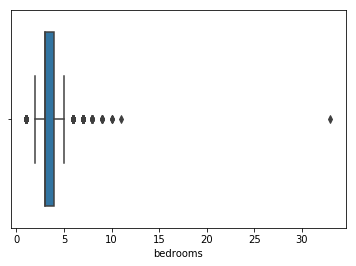

In [26]:
sns.boxplot(kc_data['bedrooms'])

In [29]:
kc_data_outliers['outlier'] = False

In [30]:
kc_data_outliers["outlier"] = (kc_data_outliers['bedrooms'] < Q1['bedrooms'] - 1.5*IQR['bedrooms']) | (kc_data_outliers['bedrooms'] > Q3['bedrooms'] + 1.5*IQR['bedrooms'])



In [31]:
kc_data_outliers.loc[kc_data_outliers['outlier'] == True].count()

price            530
bedrooms         530
bathrooms        530
sqft_living      530
sqft_lot         530
floors           530
waterfront       530
view             530
condition        530
grade            530
sqft_above       530
sqft_basement    530
yr_built         530
zipcode          530
lat              530
long             530
sqft_living15    530
sqft_lot15       530
outlier          530
dtype: int64

In [28]:
kc_data_outliers.index[5]

5

### Identifying Multicollinearity

In [20]:
kc_data_pred = kc_data.iloc[:, 3:]
kc_data_pred.head()



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [21]:
pred_corr = abs(kc_data_pred.corr())



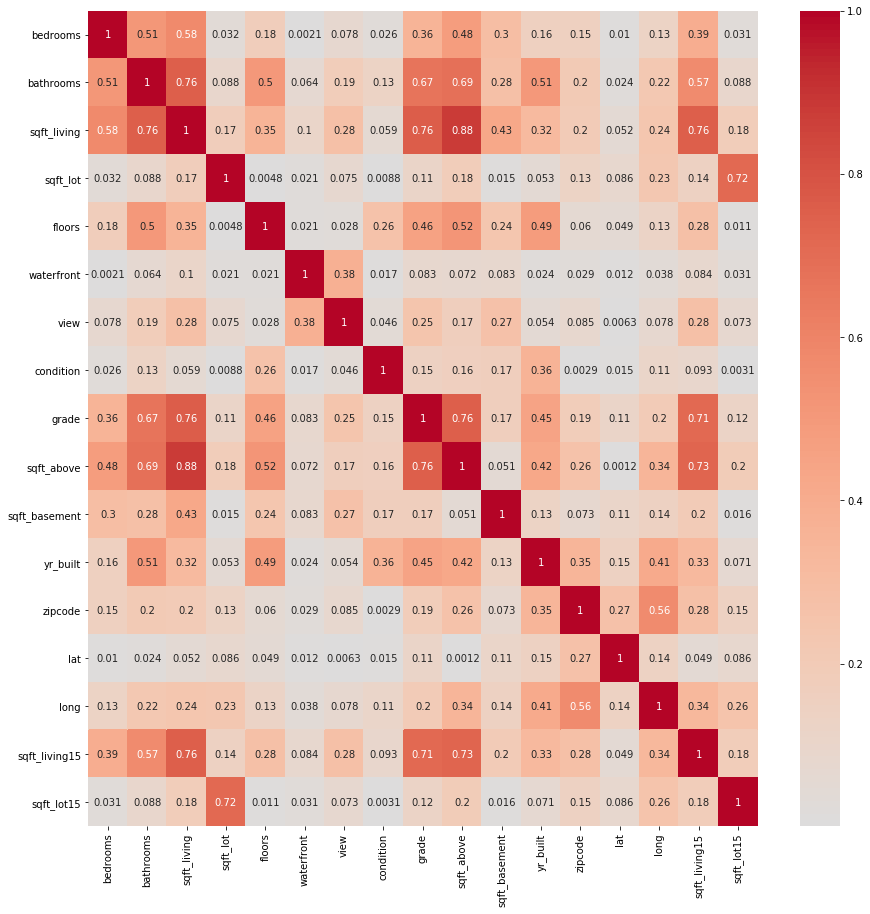

In [22]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(pred_corr, annot=True, center=0, cmap='coolwarm')


Taking collinearity to mean correlation coefficient > 0.75, we can see there is collinearity between:

- sqft_living and bathrooms
- sqft_living and sqft_living15
- sqft_living and sqft_above
- sqft_living and grade

To address this, the variable sqft_living will be dropped from the dataset.

.

In [23]:
kc_data_pred = kc_data_pred.drop(['sqft_living'], 1)
kc_data = kc_data.drop(['sqft_living'], 1)


In [24]:
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


## Building a Model

In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 6)
selector = selector.fit(kc_data_pred, kc_data['price'])


In [31]:
columns = list(kc_data_pred.columns.values)
variables_to_select = dict(zip(columns, list(selector.support_)))
variables_to_select

{'bedrooms': False,
 'bathrooms': True,
 'sqft_lot': False,
 'floors': False,
 'waterfront': True,
 'view': True,
 'condition': False,
 'grade': True,
 'sqft_above': False,
 'sqft_basement': False,
 'yr_built': False,
 'zipcode': False,
 'lat': True,
 'long': True,
 'sqft_living15': False,
 'sqft_lot15': False}

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [33]:
f = 'price~bathrooms+waterfront+view+grade+lat+long'
model = ols(formula=f, data=kc_data).fit()



In [34]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     5252.
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        12:25:02   Log-Likelihood:            -2.9767e+05
No. Observations:               21597   AIC:                         5.954e+05
Df Residuals:                   21590   BIC:                         5.954e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.052e+07   1.48e+06    -34.211      0.000   -5.34e+07   -4.76e+07
bathrooms   8.084e+04   2806.812     28.800      0.000    7.53e+04    8.63e+04
waterfront   6.53e+05    2.1e+04     31.033      0.000    6.12e+05    6.94e+05
view        8.645e+04   2341.154     36.928      0.000    8.19e+04     9.1e+04
grade       1.513e+05   1877.219     80.623      0.000    1.48e+05    1.55e+05
lat         6.366e+05   1.18e+04     54.111      0.000    6.14e+05     6.6e+05
long       -1.589e+05   1.19e+04    -13.331      0.000   -1.82e+05   -1.36e+05
==============================================================================
Omnibus:                    20229.297   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2608889.420
Skew:                           4.121   Prob(JB):                         0.00
Kurtosis:                      56.210   Cond. No.                     1.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Adjustments

### Feature Engineering: Add Year Sold into the Model

In [77]:
import datetime as dt

kc_data['year'] = kc_data['date'].dt.year
kc_data_pred = kc_data.iloc[:, 3:]

In [78]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 4)
selector = selector.fit(kc_data_pred, kc_data['price'])

In [79]:
columns = list(kc_data_pred.columns.values)
variables_to_select = dict(zip(columns, list(selector.support_)))
variables_to_select

{'bedrooms': False,
 'bathrooms': False,
 'sqft_lot': False,
 'floors': False,
 'waterfront': True,
 'view': False,
 'condition': False,
 'grade': True,
 'sqft_above': False,
 'sqft_basement': False,
 'yr_built': False,
 'zipcode': False,
 'lat': True,
 'long': True,
 'sqft_living15': False,
 'sqft_lot15': False,
 'year': False}

In [80]:
f = 'price~waterfront+grade+lat+long'
model = ols(formula=f, data=kc_data).fit()

In [81]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     6610.
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        09:43:43   Log-Likelihood:            -2.9876e+05
No. Observations:               21597   AIC:                         5.975e+05
Df Residuals:                   21592   BIC:                         5.976e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.108e+07   1.53e+06    -33.424      0.000   -5.41e+07   -4.81e+07
waterfront  9.492e+05   2.06e+04     46.147      0.000    9.09e+05    9.89e+05
grade       1.998e+05   1480.731    134.913      0.000    1.97e+05    2.03e+05
lat         6.039e+05   1.23e+04     48.907      0.000     5.8e+05    6.28e+05
long       -1.749e+05   1.23e+04    -14.165      0.000   -1.99e+05   -1.51e+05
==============================================================================
Omnibus:                    20331.624   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2605725.825
Skew:                           4.160   Prob(JB):                         0.00
Kurtosis:                      56.164   Cond. No.                     1.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  Feature Engineering: Log Transforming Non-Normally Distributed Variables

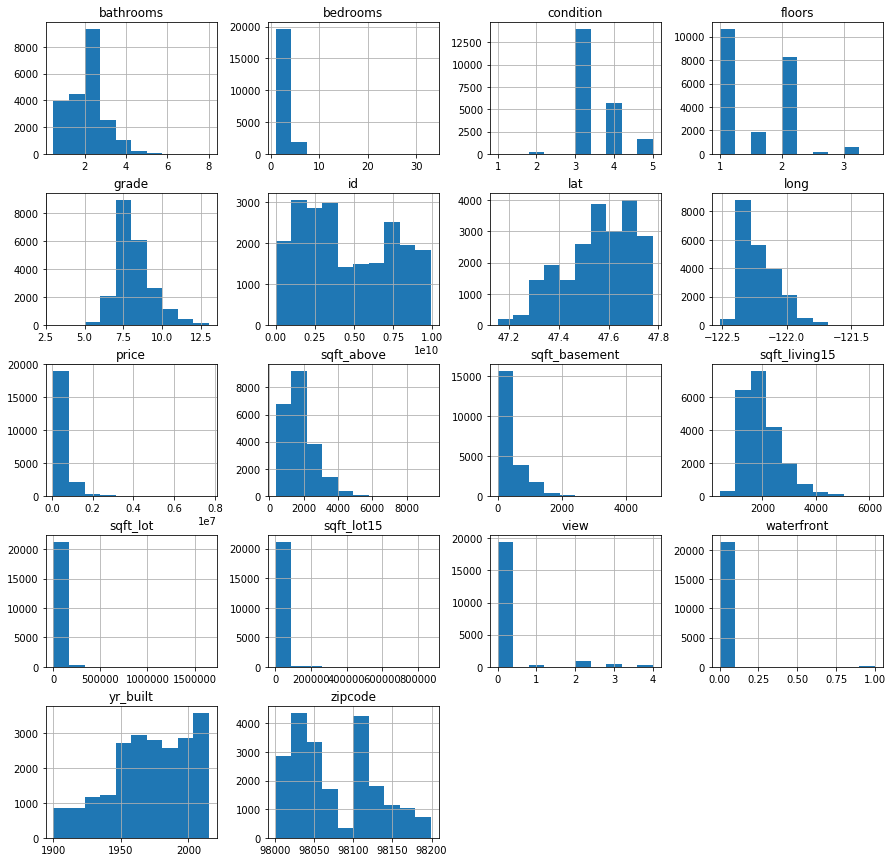

In [35]:
kc_data.hist(figsize=(15,15))
plt.show()

In [42]:
kc_data['sqft_lot'] = np.log(kc_data['sqft_lot'])


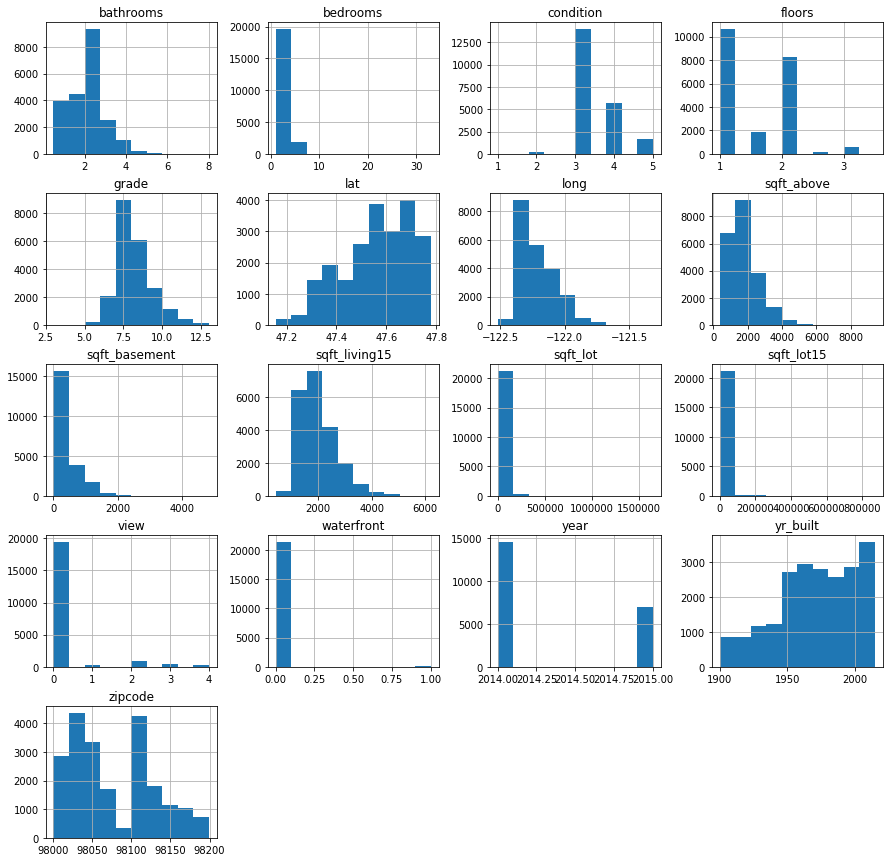

In [43]:
kc_data_pred.hist(figsize=(15,15))
plt.show()